In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
import sys
import keras
print('Python: {}'.format(sys.version))
print('Keras: {}'.format(keras.__version__))

Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
Keras: 2.12.0


In [4]:
# Load the data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
# Dataset Characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [6]:
# Single image
print(X_train[0].shape)

(32, 32, 3)


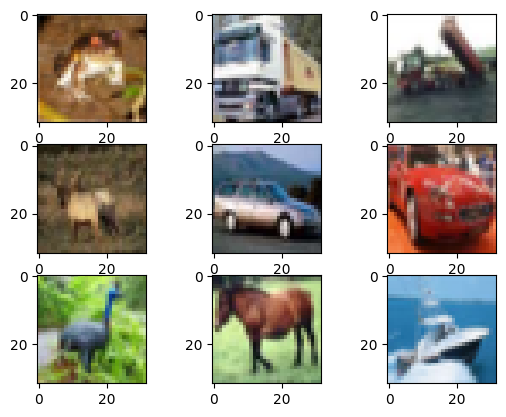

In [7]:
# Creating grid of 3X3 images

for i in range (0,9):
    plt.subplot(330 + 1 + i)
    img=X_train[i].transpose([0,1,2])
    plt.imshow(img)
    
plt.show()

In [8]:
# Preprocessing the dataset

# Fix random seed for reproducibility

seed=6
np.random.seed(seed)

# Load the data

(X_train,y_train),(X_test,y_test)=cifar10.load_data()

# Normalize the inputs from 0-255 to 0.0-1.0

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train=X_train/255.0
X_test=X_test/255.0

In [9]:
# Class Labels shape

print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [10]:
# [6]=[0,0,0,0,0,0,1,0,0,0] This is one-hot vector

# Hot encode outputs

Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)
num_class=Y_test.shape[1]
print(num_class)

print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
# Building All CNN

from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D,GlobalAveragePooling2D
from keras.optimizers import SGD

In [12]:
# Define the model function
# We are defining this based on that particular ieee paper given in that video

def allcnn(weights=None):
    
#     Define model type-sequential
    model=Sequential()
    
#     Add model layers
    model.add(Conv2D(96,(3,3),padding='same',input_shape=(32,32,3)))     
#     96 is ReLU (Rectified Linear Unit), 3 by 3 combination
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    
#     Add Global Average Pooling Layer with Softmax activation

    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
#     Load the weights

    if weights:
        model.load_weights(weights)
        
#     Return the model

    return model

In [ ]:
# Define hyper parameters

learning_rate=0.01
weight_decay=1e-6
momentum=0.9

# Build model
model = allcnn()

# Define optimizer and compile model
sgd=SGD(lr=learning_rate,decay=weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

# Print model summary
model.summary()

# Define additional training parameters
epochs=350
batch_size=32

#Fit the model
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=batch_size,verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 96)        2688      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 96)        83040     
                                                                 
 activation_8 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 96)        83040     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 96)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 192)      

KeyboardInterrupt: ignored

In [16]:
# Define hyper parameters

learning_rate=0.01
weight_decay=1e-6
momentum=0.9

# Build model
weights='all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# Define optimizer and compile model
sgd=SGD(lr=learning_rate,decay=weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

# Print model summary
model.summary()

# Define additional training parameters
epochs=350
batch_size=32

#Test the model with pretrained weights
scores=model.evaluate(X_test,Y_test,verbose=1)
print('Accuracy: {}'.format(scores[1]))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 96)        2688      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 96)        83040     
                                                                 
 activation_8 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 96)        83040     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 96)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 192)      

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


313/313 [==============================] - 108s 345ms/step - loss: 0.5152 - accuracy: 0.9088
Accuracy: 0.9088000059127808


In [17]:
# Make dictionary of class labels and names

classes=range(0,10)

names=['airplane',
       'automobile',
       'bird',
       'cat',
       'deer',
       'dog',
       'frog',
       'horse',
       'ship',
       'truck']

# Zip the names and classes to make a dictionary of class labels

class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [18]:
# Generate batch of 9 images to predict

batch=X_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)

# Make predictions

predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 158ms/step


In [22]:
# Print the predictions

print(predictions)

[[4.5647404e-18 1.0581064e-20 1.8923349e-10 2.1411525e-11 9.9999923e-01
  2.8037576e-07 3.1478845e-13 4.2381566e-07 1.3699609e-19 1.2097111e-18]
 [2.1190902e-16 2.0386622e-17 1.5672675e-09 5.3581516e-07 1.6256109e-10
  9.9999934e-01 1.6712490e-09 2.0782188e-08 3.6548049e-15 3.5128328e-16]
 [1.2720516e-30 5.0274018e-28 5.1540022e-24 3.6051540e-21 1.0875263e-27
  8.1522774e-22 9.9999994e-01 1.1050991e-27 6.1924607e-32 1.2274380e-23]
 [1.5143943e-16 4.7669236e-18 2.2583866e-09 9.9999994e-01 4.3481708e-11
  1.6884370e-12 4.5317640e-13 2.6687359e-16 7.2659974e-19 6.2050649e-17]
 [8.2496049e-36 9.9999994e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.3560899e-36 8.6861983e-30 8.2186301e-22]
 [5.9699727e-24 9.9999994e-01 7.5485260e-27 8.0228679e-27 1.9714099e-30
  2.7338919e-29 7.2188486e-31 5.5680364e-27 1.6186990e-26 1.1906195e-13]
 [6.4563788e-18 2.9642421e-20 1.0046514e-11 9.9999982e-01 6.0156123e-13
  9.1111502e-08 7.8874780e-12 1.1608744e-15 7.8588055e-21 

In [23]:
# These are class probabilities, should sum to 1

for image in predictions:
  print(np.sum(image))

0.99999994
0.9999999
0.99999994
0.99999994
0.99999994
0.99999994
0.99999994
0.99999994
1.0


In [24]:
# Use np.argmax() to convert class probabilities to class labels

class_result=np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


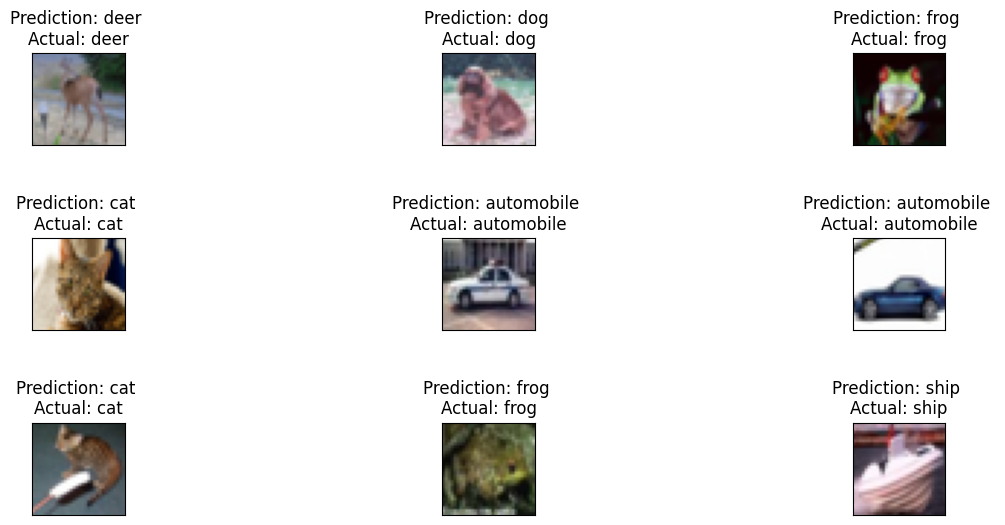

In [26]:
# Create a grid of 3X3 images

fig,axs=plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i,img in enumerate(batch):

  # Determine label for each prediction,set title
  for key,value in class_labels.items():
    if class_result[i] == key:
      title='Prediction: {} \nActual: {}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  # Plot the image
  axs[i].imshow(img.transpose([0,1,2]))


plt.show()
   